In [ ]:
## https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics/data

## EDA Student Performance Indicator

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("exams.csv")

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [ ]:
df.shape

(1000, 8)

if any dataset is given i first need to perform following operations on it :

    1. Check Missing Values
    2. Check Duplicates
    3. Check Data types
    4. Check the no. of unique values of each coloumn
    5. Check statistics of data set
    6. Check various categories present in the different categorical  column

In [ ]:
# 1. checking Missing Values
df.isnull().sum()         # no missing value is here

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# we can also find for missing values as
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
#2. Check Duplicates
df.duplicated().sum()
df[df.duplicated()]       # no duplicate element is present here

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [ ]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [ ]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
pd.Categorical(df)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
Categories (8, object): ['gender', 'lunch', 'math score', 'parental level of education',
                         'race/ethnicity', 'reading score', 'test preparation course',
                         'writing score']

In [ ]:
# 3. Checking Datatypes of each coloumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# 4. Checking the number of uniques values for each coloumns
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,79
reading score,71
writing score,74


In [ ]:
# 5. Check the statistics of dataset
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


Insights or Observation from the above statistical analysis

    1. all means are very close to each other - between 67 to 69.14
    2. all the standard deviation are also close- between 14.11 to 15.25
    3. minimum score in math = 15 , reading = 25, writing  = 15

In [ ]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.811767,0.790055
reading score,0.811767,1.000000,0.948909
writing score,0.790055,0.948909,1.000000


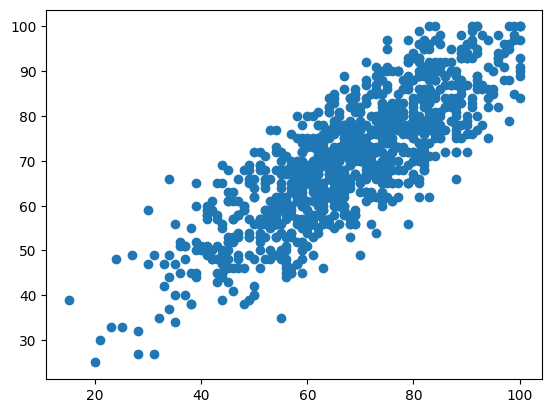

In [ ]:
plt.scatter(df['math score'],df['reading score'])

In [ ]:
# 6. now let's check various categories present in data

In [ ]:
# 1. let's get numerical and categorical data differently
[feature for feature in df.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [ ]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']     ## it segregates all of the strings

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype == 'int']

In [ ]:
categorical_feature,numerical_feature

(['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'],
 ['math score', 'reading score', 'writing score'])

In [ ]:
df['gender'].value_counts()

,count
gender,
male,508
female,492


In [ ]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,323
group D,257
group B,198
group E,143
group A,79


In [ ]:
## now let's try to get meaning of those categorical data's

In [ ]:
## Aggregate the total score with mean ( make two new coloumns first of total score and average score)

df['total_score'] = (df['math score']+df['reading score']+df['writing score'])
df['Average']   = (df['total_score'])/3

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


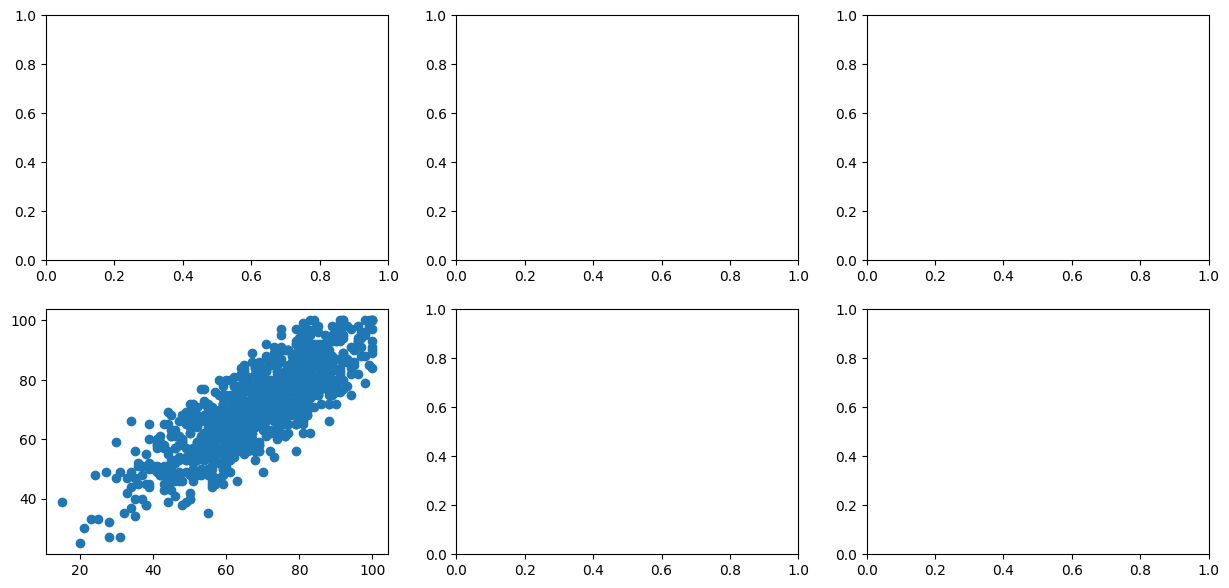

In [ ]:
##### Exploring More Visulization
plt.subplots(2,3,figsize =(15,7))         # 1 -> no. of rows # 2 -> no. of columns  # figsize -> size of the figure
plt.subplot(234)
plt.scatter(data = df,x= 'math score',y= 'reading score')

In [ ]:
pd.Categorical(df)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'total_score', 'Average']
Categories (10, object): ['Average', 'gender', 'lunch', 'math score', ..., 'reading score',
                          'test preparation course', 'total_score', 'writing score']

In [ ]:
import seaborn as sns

<Axes: xlabel='Average', ylabel='Count'>

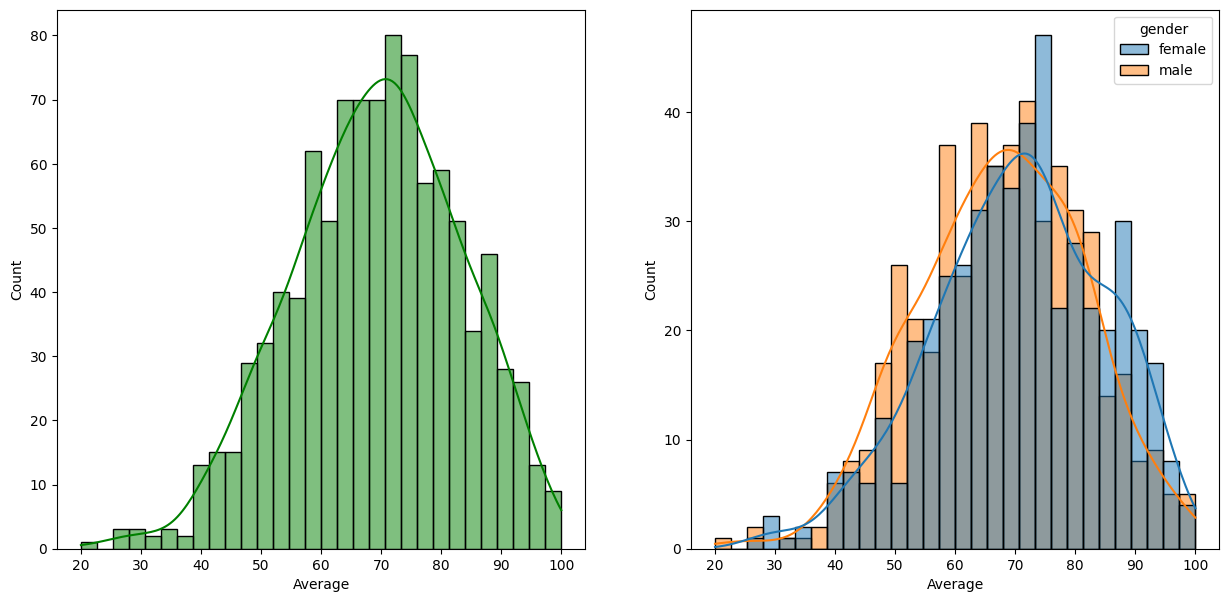

In [ ]:
fig,axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x ='Average',bins = 30,kde = True,color='g')
plt.subplot(122)
sns.histplot(x = df.Average,bins = 30 , kde = True , hue = df.gender)

Insight from above graph is that average score of females is greater than that of male

In [ ]:
df.groupby('gender')['Average'].mean()      # we can also see it clearly but the difference is not that much

,Average
gender,
female,70.562331
male,67.704724


<Axes: xlabel='Average', ylabel='Count'>

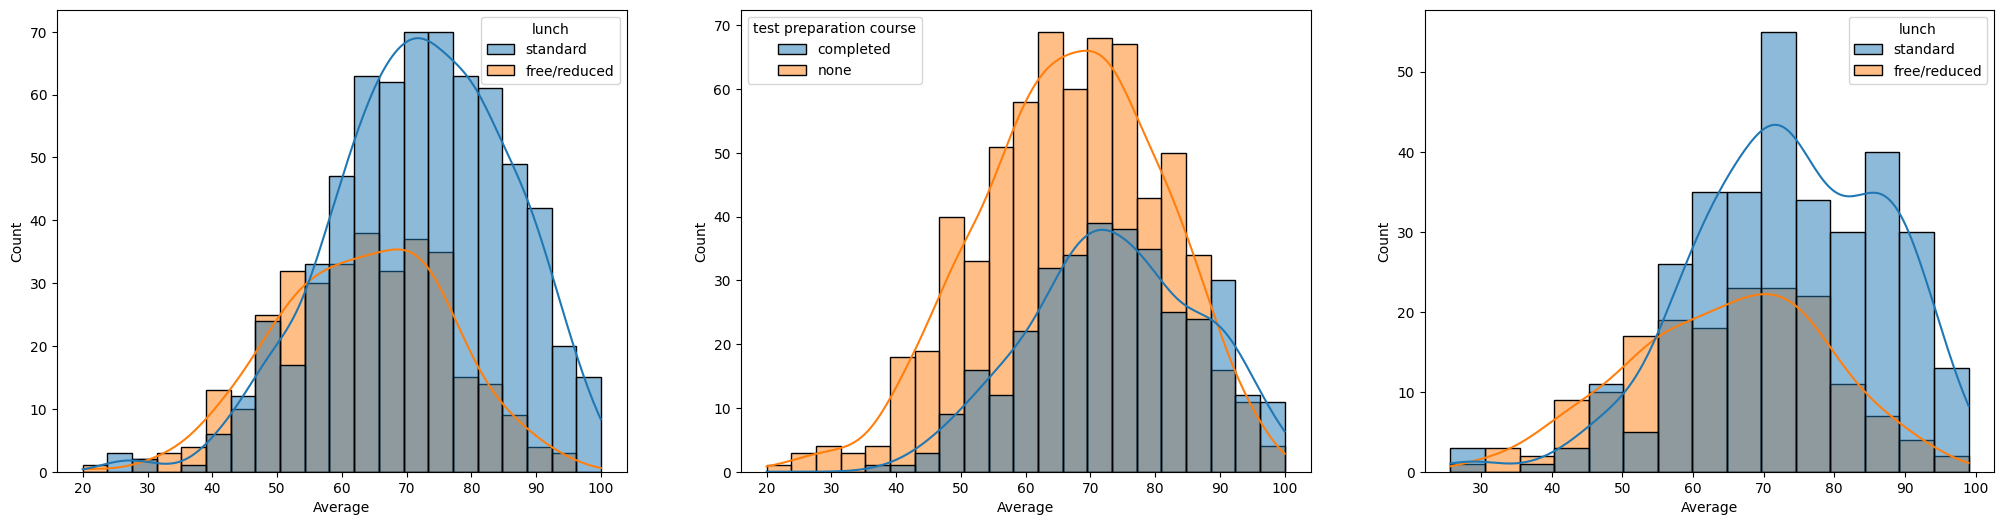

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df,x = 'Average',kde = True,hue = 'lunch')
plt.subplot(132)
sns.histplot(data= df,x = 'Average',kde = True,hue = 'test preparation course')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'Average',hue = 'lunch',kde= True)

Insights :

    - Standard Lunch help students to perform well in exam
    - those who not takes test preparation course actually performs well in exam
    - Standard Lunch help females to perform well in exam

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


<Axes: xlabel='Average', ylabel='Count'>

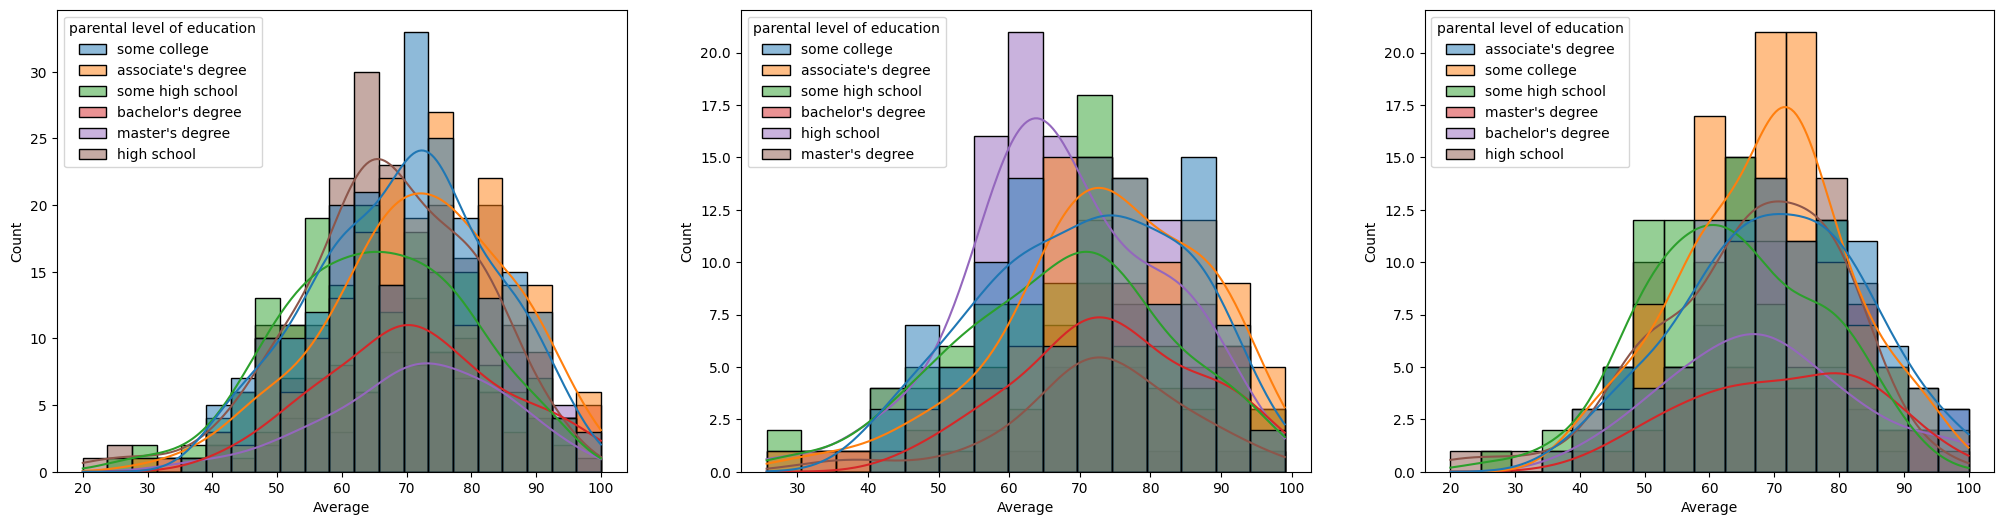

In [ ]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df,x = 'Average',hue = 'parental level of education',kde = True)
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'],x = 'Average',hue = "parental level of education",kde = True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'Average',hue = 'parental level of education',kde = True)

 Insights :

    -1st plot : In general parental level of education does not effect students performance in exams
    -2nd plot : Parental level of eduction doesnot effects females performance much
    -3rd plot : Males whose parents have masters degreee tend to perform well than others

<Axes: xlabel='Average', ylabel='Count'>

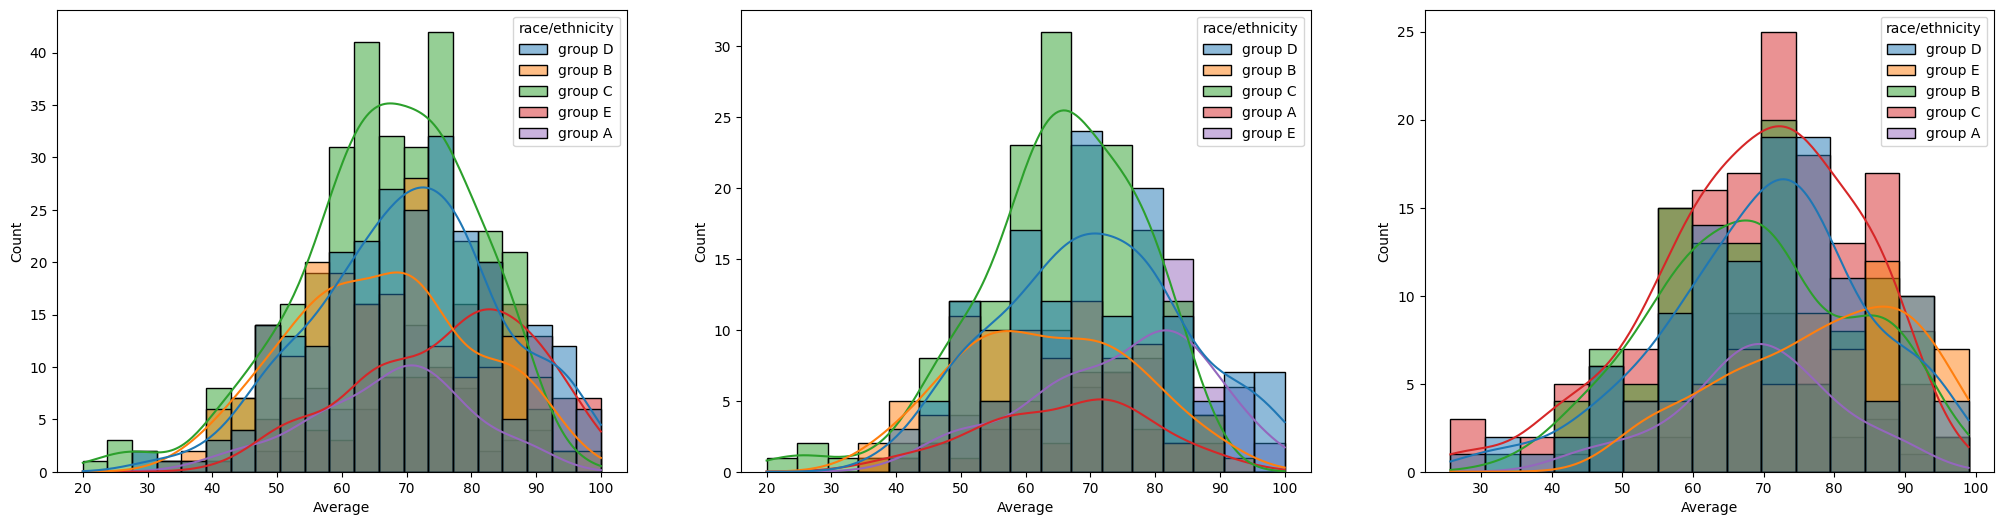

In [ ]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df,x = 'Average',hue = 'race/ethnicity',kde = True)
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'],x = "Average",hue = 'race/ethnicity',kde= True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'],x = "Average",hue = 'race/ethnicity',kde= True)

Insights :

    1st plot: Group E perform in average than any other group
    2nd plot: Group E females tend to perform well then others  but group  B females perform worst
    3rd plot: Group A mens performs worst and E performs best in averagely

In [ ]:
df.dtypes != 'O'
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
df1  = df[numerical_feature]

In [ ]:
# we can also make df_numeric only using df.select_dtypes(include = 'number')
df.select_dtypes(include = 'number')

,math score,reading score,writing score,total_score,Average
0,59,70,78,207,69.000000
1,96,93,87,276,92.000000
2,57,76,77,210,70.000000
3,70,70,63,203,67.666667
4,83,85,86,254,84.666667
...,...,...,...,...,...
995,77,77,71,225,75.000000
996,80,66,66,212,70.666667
997,67,86,86,239,79.666667
998,80,72,62,214,71.333333


In [ ]:
df.select_dtypes(exclude = 'number')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group D,some college,standard,completed
1,male,group D,associate's degree,standard,none
2,female,group D,some college,free/reduced,none
3,male,group B,some college,free/reduced,none
4,female,group D,associate's degree,standard,none
...,...,...,...,...,...
995,male,group C,some college,standard,none
996,male,group C,some college,standard,none
997,female,group A,high school,standard,completed
998,male,group E,high school,standard,none


<Axes: >

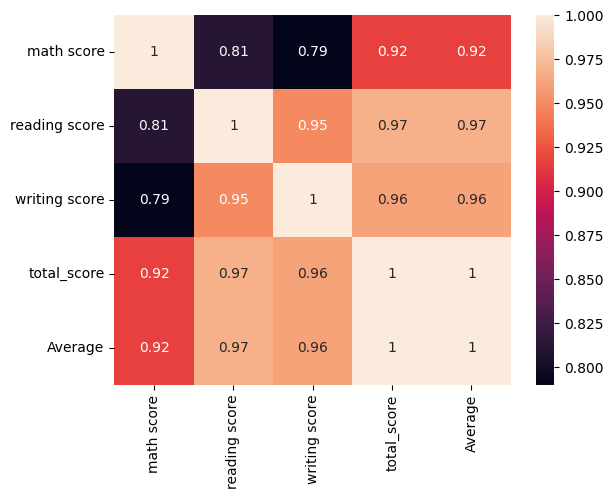

In [ ]:
sns.heatmap(df1.corr(),annot= True)   # yha prr mujhe df1 hi karna padega kyuki isme nhi toh string can not be converted into float error aayege
# numeric_only = True bhi nhi krr sakte heat map mein

# Algerian Forest Fires Data Set

    🔢 Date Columns
day – The day of the month when the data was recorded (1 to 31).

month – The month when the data was recorded, usually as a string like 'June', 'July', etc.

year – The year of the record, such as 2012.

These are just for time-tracking and often get converted into a datetime object or used to extract seasonal info.

🌡️ Meteorological Variables
Temperature – The air temperature in °C at the time of the recording.

RH (Relative Humidity) – The relative humidity, expressed as a percentage. It indicates how much moisture is in the air compared to the maximum the air can hold at that temperature.

Ws (Wind Speed) – The wind speed in km/h. Higher wind can contribute to spreading fires.

Rain – Rainfall in mm/m². It's usually very low or zero during fire incidents.

🔥 Fire Weather Indices (FWI System)
These are important indicators developed by forestry experts to evaluate fire danger levels:

FFMC (Fine Fuel Moisture Code)

Reflects moisture content of surface litter and fine fuels.

Range: 0 to 101 (higher = drier and more flammable).

A higher FFMC means the forest floor is very dry and easy to ignite.

DMC (Duff Moisture Code)

Represents the moisture content of loosely compacted organic layers (duff) under the litter.

Affects fire sustainability. Higher DMC = more prone to persistent burning.

DC (Drought Code)

Indicates deep soil moisture and long-term dryness.

High DC = prolonged drought, so once a fire starts, it's harder to extinguish.

ISI (Initial Spread Index)

Combines FFMC and wind to estimate how quickly a fire can spread.

Higher ISI = faster initial fire spread.

BUI (Build-Up Index)

Combines DMC and DC to show the total fuel available for combustion.

Higher = more intense fire is possible.

FWI (Fire Weather Index)

The final fire danger rating, combining ISI and BUI.

This is the most important index – higher values = higher danger and potential for serious fires.

🔥 Fire Classification
Classes

Indicates whether a fire actually occurred or not.

Usually binary: 'fire' or 'not fire'.

Sometimes used as a target variable for classification models.

🌍 Geographical Region
Region

Indicates the area of Algeria where the data was collected.

Might be like 'Bejaia', 'Sidi-Bel Abbes', etc.

Useful for spatial analysis – fire behavior might vary by region due to geography and vegetation.



## Algerian Forest Fire DataSet Cleaning and Making model for prediction

In [6]:
# data set link :
# https://www.kaggle.com/datasets/prashantsparhad/algerian-forest-fires-cleaned-dataset/data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/Algerian_forest_fires_cleaned_dataset.csv")

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.shape

(243, 15)

In [10]:
# 1. checking for missing values
df.isnull().sum()   # no null value is here

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [11]:
# 2. now check for duplicates
df.duplicated().sum()     # no duplicates

np.int64(0)

In [12]:
# 3. Now finding which types of data is present in data
df.info()       # classes chod sab unique hain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [13]:
#4 now let's find how many unique values are present in data
df.nunique()

,0
day,31
month,4
year,1
Temperature,19
RH,62
Ws,18
Rain,39
FFMC,173
DMC,165
DC,197


In [14]:
# 5. Now let's perform various mathematical analysis
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


<Axes: >

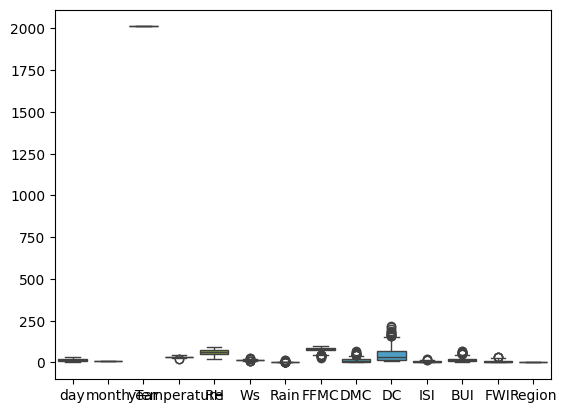

In [15]:
sns.boxplot(df)     # it shows if outliers are present in the data or not

<Axes: >

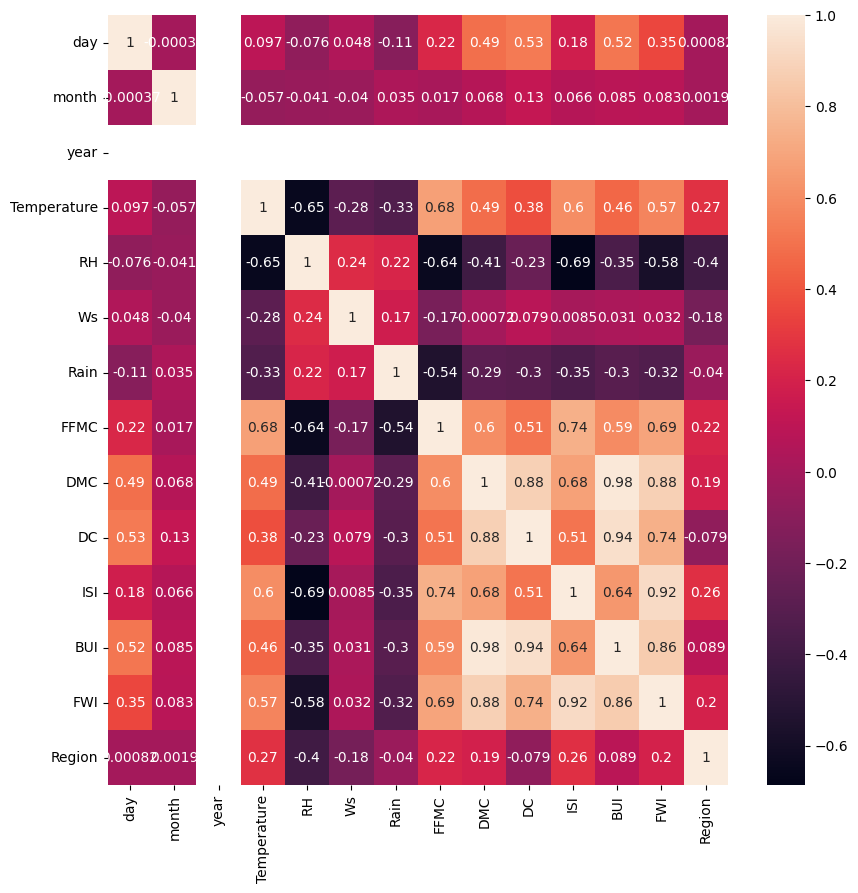

In [16]:
df_numeric_only = df.select_dtypes(include = 'number')
plt.figure(figsize = (10,10))
sns.heatmap(df_numeric_only.corr(),annot = True)

In [17]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0


In [18]:
# 6. Now let's get annalysis of various coloumns
# first let see kis din sabse jyada fire hue
t = { 'not fire' : 0,
     'not fire   ':0,
      'fire   '  : 1,
      'fire ' : 1,
      'not fire' : 0,
      'not fire ':0,
      'not fire     ' :0,
      'not fire    ' : 0,
     'fire' : 1 }

df['fire_class'] = df['Classes'].map(t)
df['fire_class'].unique()
df['fire_class'].isnull().sum()

np.int64(0)

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,fire_class
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0


In [31]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,fire_class
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,0
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1,0


<Axes: xlabel='day', ylabel='Count'>

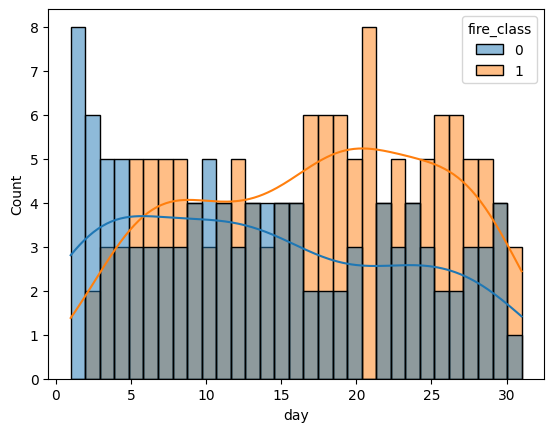

In [20]:
# now let's find which day fire is occurring mostly
sns.histplot(data = df,x = 'day',kde = True,hue = 'fire_class',bins = 31)

Insights :

    1. fire occurs most in 21st day and least at day 1
    

<Axes: xlabel='Temperature', ylabel='RH'>

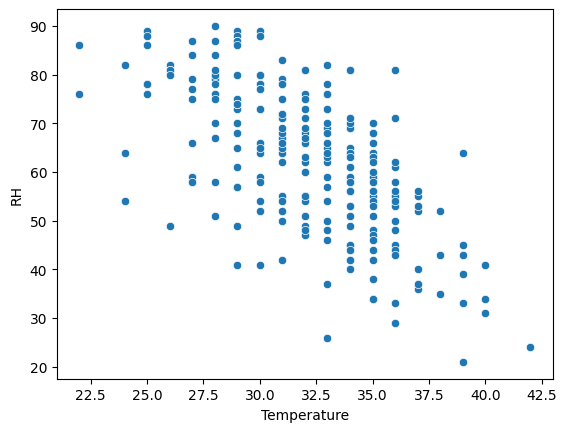

In [21]:
sns.scatterplot(x = df.Temperature, y = df.RH)
# insight : when temperature increases humidity decreases

In [22]:
df['Region'].unique()

array([0, 1])

In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,fire_class
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0


<Axes: xlabel='FWI', ylabel='Count'>

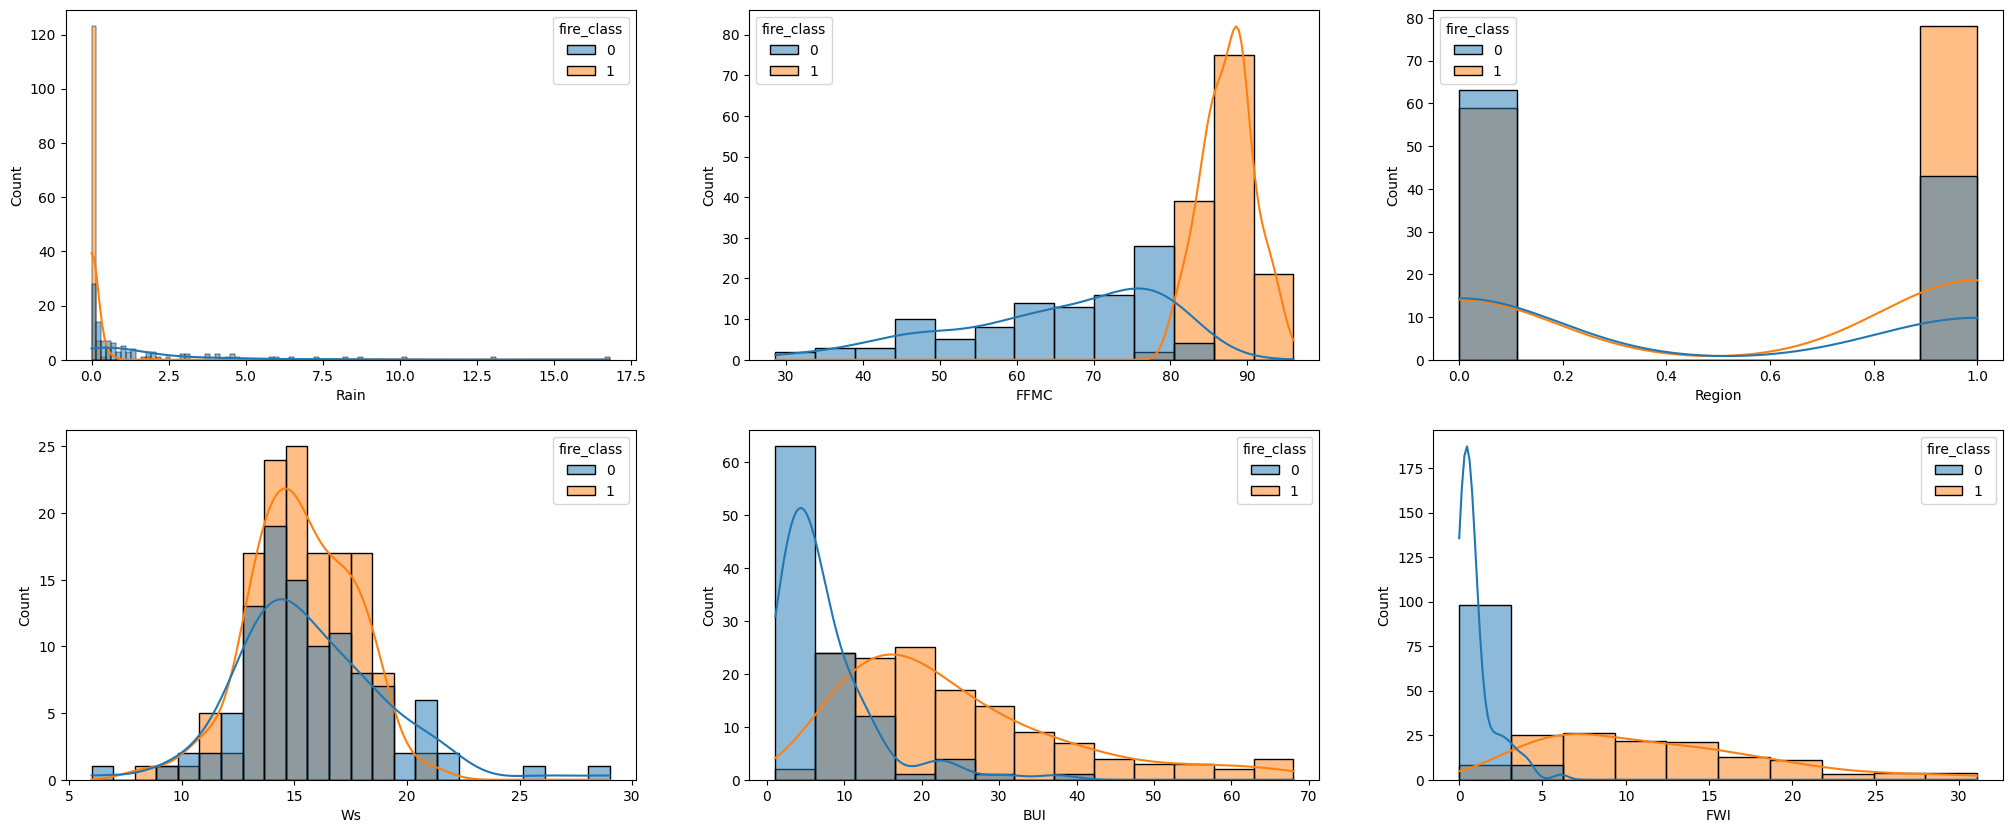

In [24]:
plt.subplots(2,3,figsize = (25,10))
plt.subplot(231)
sns.histplot(data = df, x = 'Rain',hue = 'fire_class',kde = True)
plt.subplot(232)
sns.histplot(data = df,x = 'FFMC',hue = 'fire_class',kde = True)
plt.subplot(233)
sns.histplot(data = df, x = 'Region',hue = 'fire_class',kde = True)
plt.subplot(234)
sns.histplot(data= df , x = 'Ws',hue  = 'fire_class',kde = True)
plt.subplot(235)
sns.histplot(data = df, x = 'BUI',hue = 'fire_class',kde = True)
plt.subplot(236)
sns.histplot(data= df , x = 'FWI',hue  = 'fire_class',kde = True)

 Insights:

    1st plot: when fires doest not happens or is less at those times chances of fire are more and that's why counts are highest when rain is nill
    2nd plot: when FFMC is lower than 80 then forest doesnot catches fire
            > chances of cathing fire is most in between 80 to 100 FFMC
    3rd plot: chances of catching fire in region one is more then when comparing to region 2
    4th plot : chances of catching fire is more when wind belows in between 14 to 20
    5th plot : when BUI increases chances of catching fire also increase
    6th plot : when FWI increases chances of catching fire also increases

<Axes: xlabel='ISI', ylabel='Count'>

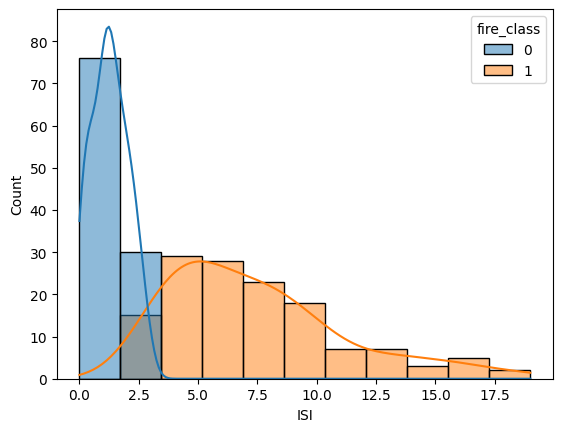

In [25]:
sns.histplot(data = df, x = 'ISI',kde = True,hue = 'fire_class')

Insights:

    1. When ISI is more chances of catching fire is more
    2. if ISI is less then 2.5 then forest prone to not catching fire

<Axes: xlabel='fire_class', ylabel='Ws'>

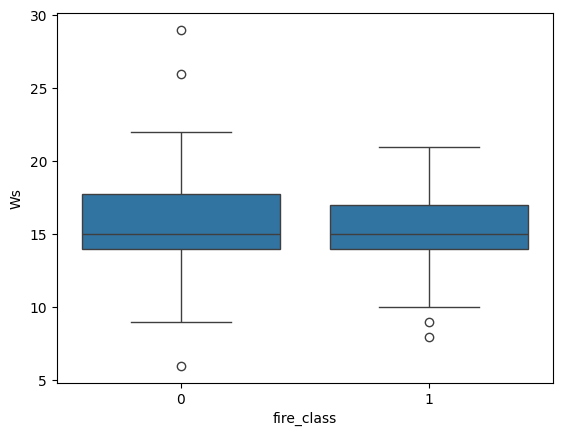

In [26]:
# now let's find relation between wind speed and fire
sns.boxplot(x = 'fire_class', y = 'Ws',data = df)

In [27]:
df[['Ws','fire_class','FWI','BUI','ISI']].corr()>0.8

,Ws,fire_class,FWI,BUI,ISI
Ws,True,False,False,False,False
fire_class,False,True,False,False,False
FWI,False,False,True,True,True
BUI,False,False,True,True,False
ISI,False,False,True,False,True


In [28]:
df_num = df.select_dtypes(include = 'number')
t =df_num.corr()
t[df_num.corr() >0.8]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,fire_class
day,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ws,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.875925,NaN,0.982248,0.875864,NaN,NaN
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875925,1.000000,NaN,0.941988,NaN,NaN,NaN


Insights:

  1. Fire depends on ISI,FWI,BUI
  2. FWI depends on both ISI and BUI
  3. so we can say that FWI decides whether fire may happen or not most correctly

In [30]:
df.to_csv("my_algerian_forest_file_cleaned_dataset.csv")

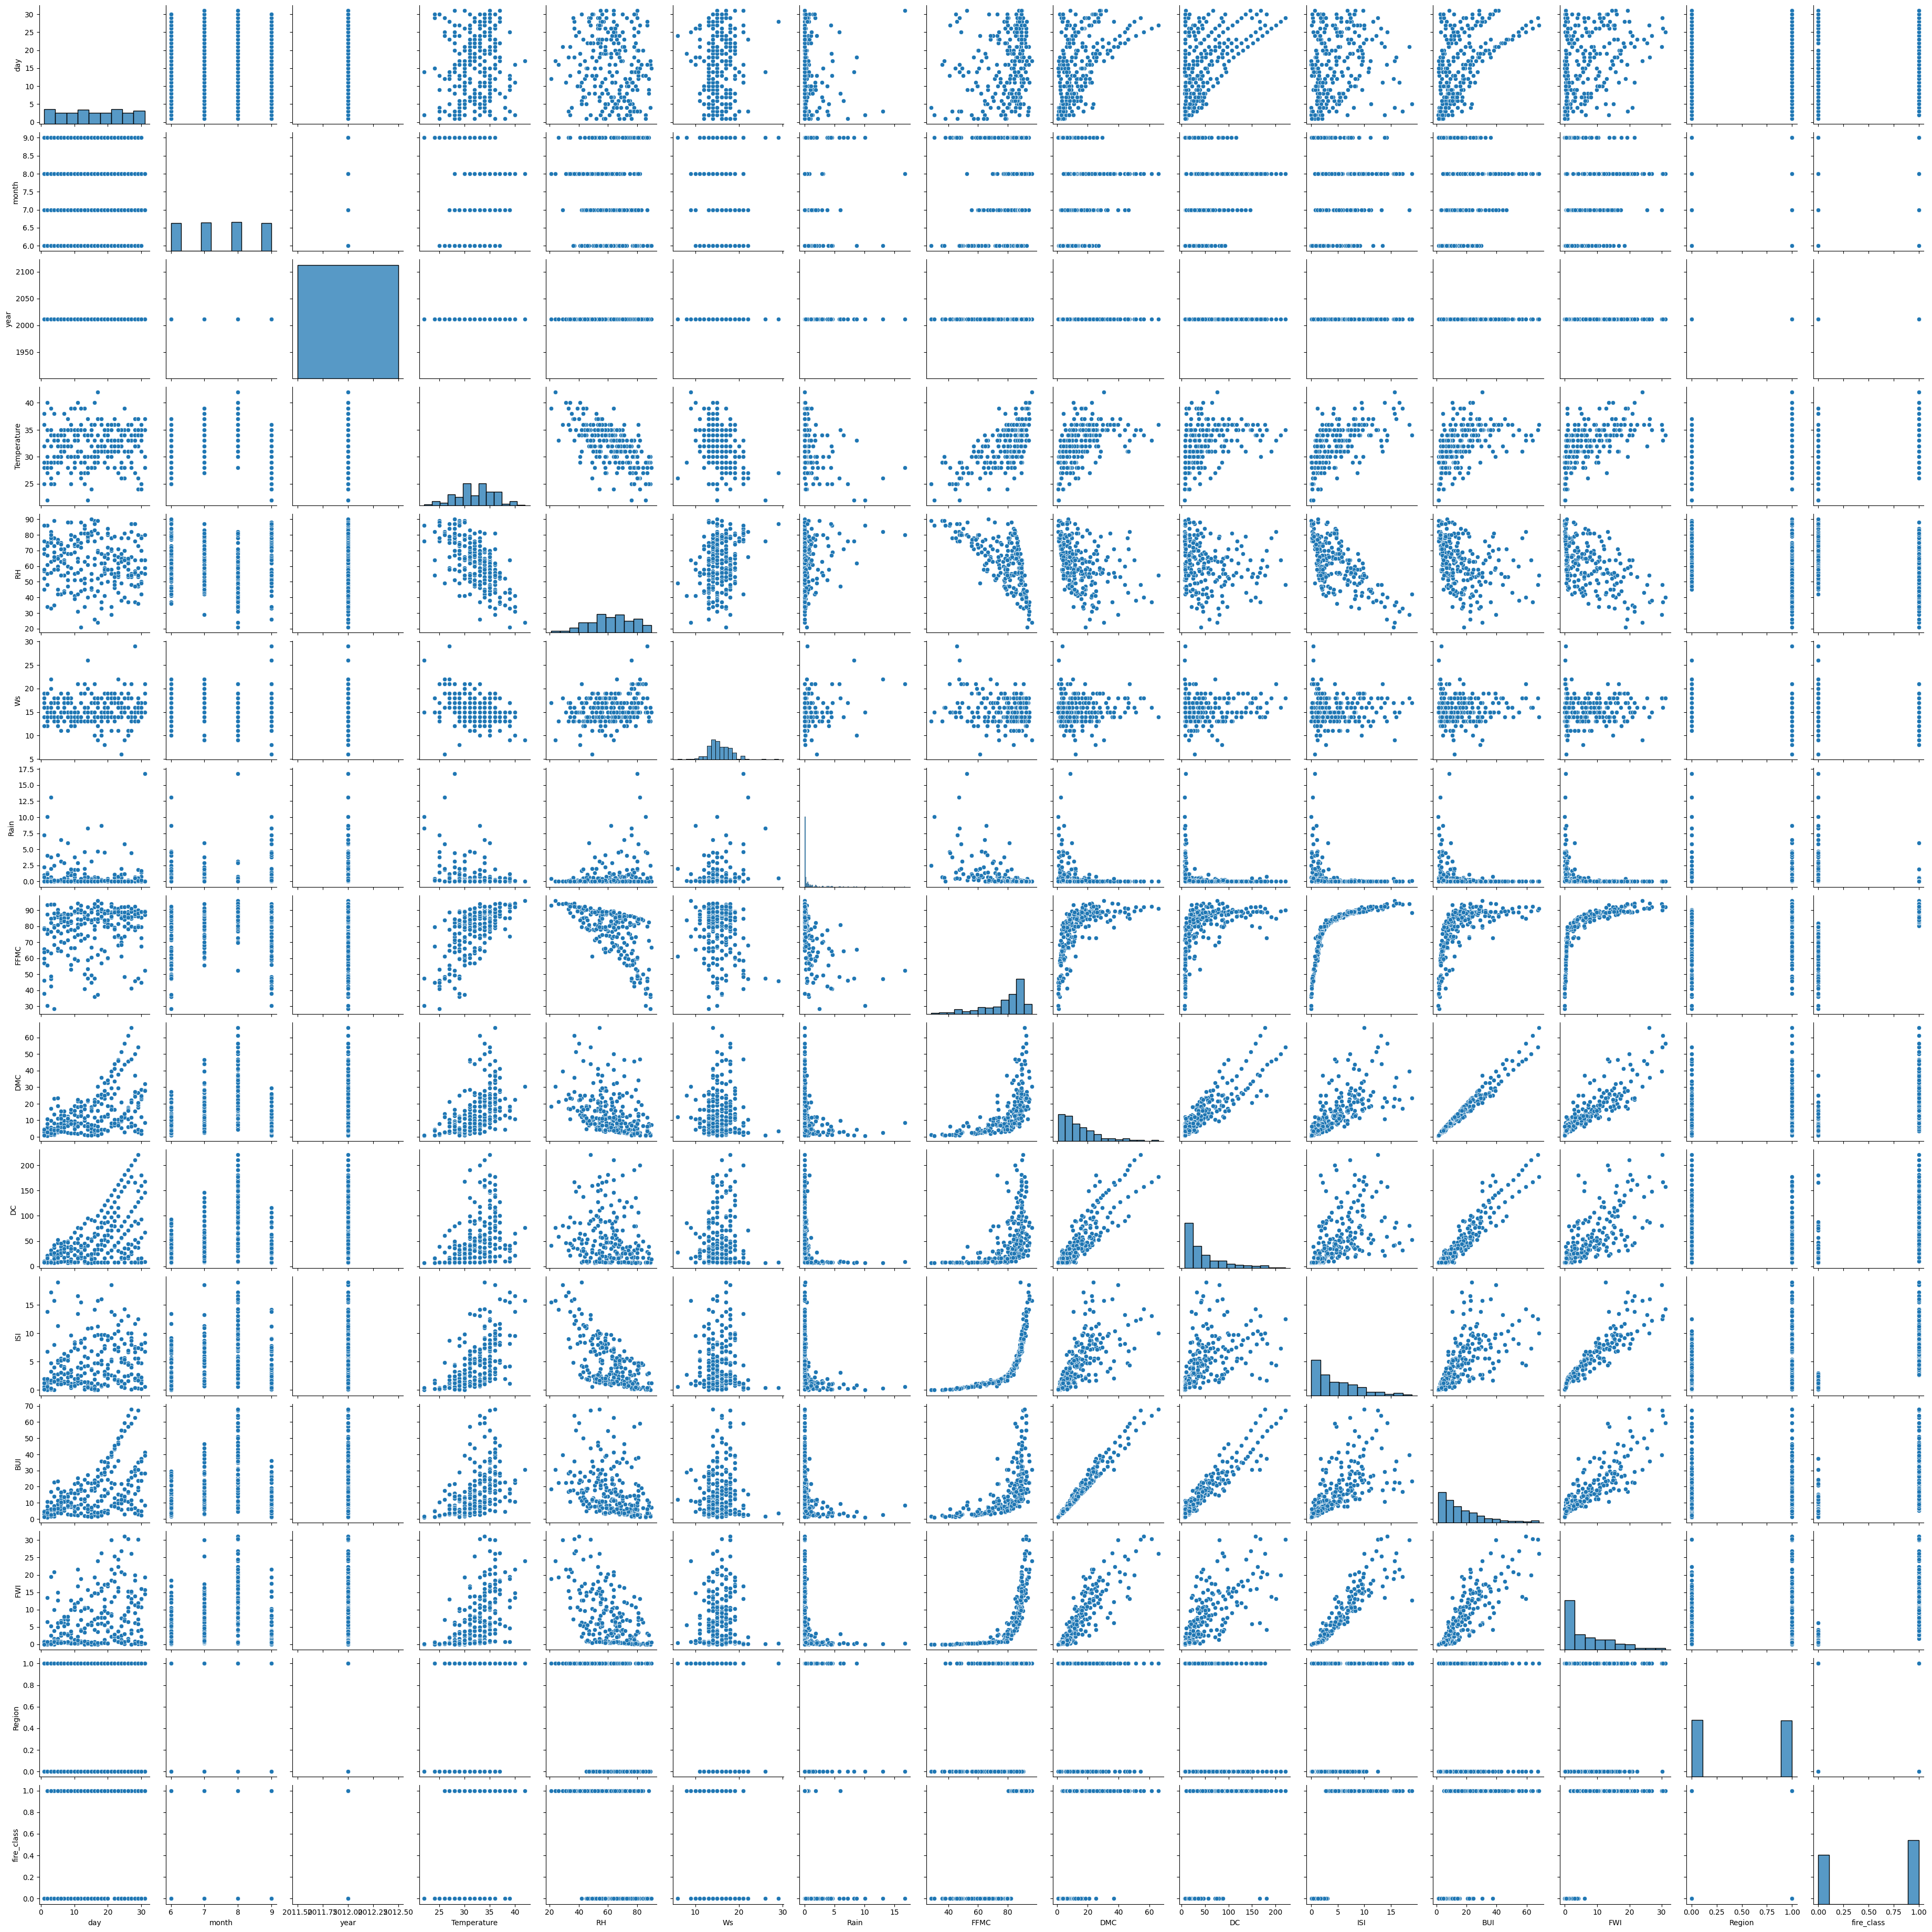

In [29]:
sns.pairplot(df)

In [137]:
df.drop('Classes',axis = 1,inplace=True)

KeyError: "['Classes'] not found in axis"

In [138]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,fire_class
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [139]:
df.columns.str.strip()

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'fire_class'],
      dtype='object')

In [140]:
df_copy = df[[col for col in df.columns if col not in ['day','month','year','FWI']]].copy()
X = df_copy.iloc[:,:]        ## yha X mein day month and year ki utni jarrorat nhi hain so simply not include them
y = df['FWI']
print(X)
print(y)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Region  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4       0   
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9       0   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7       0   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7       0   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9       0   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...     ...   
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9       1   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2       1   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4       1   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1       1   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8       1   

     fire_class  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
238           1  
239

In [141]:
X.shape,y.shape

((243, 11), (243,))

In [142]:
# now let's first train_test_split our data for performing multiple linear regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state= 30)

In [143]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((194, 11), (194,), (49, 11), (49,))

In [144]:
# Now let's Standardize our X_train and according to it our X_test also
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [145]:
scaler

StandardScaler()

In [146]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
X_train.corr(method = 'pearson')


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,fire_class
Temperature,1.000000,-0.694231,-0.351289,-0.354131,0.711466,0.510134,0.367932,0.651447,0.470337,0.321965,0.559070
RH,-0.694231,1.000000,0.329912,0.230951,-0.650814,-0.372123,-0.188177,-0.677591,-0.312393,-0.416696,-0.419248
Ws,-0.351289,0.329912,1.000000,0.202646,-0.233357,-0.041346,0.051370,-0.090821,-0.004074,-0.245130,-0.129585
Rain,-0.354131,0.230951,0.202646,1.000000,-0.532711,-0.290344,-0.296590,-0.342967,-0.297941,-0.061376,-0.366360
FFMC,0.711466,-0.650814,-0.233357,-0.532711,1.000000,0.618412,0.507471,0.734046,0.598829,0.241269,0.759521
DMC,0.510134,-0.372123,-0.041346,-0.290344,0.618412,1.000000,0.886243,0.671052,0.982368,0.178349,0.614003
DC,0.367932,-0.188177,0.051370,-0.296590,0.507471,0.886243,1.000000,0.498121,0.945850,-0.115001,0.522320
ISI,0.651447,-0.677591,-0.090821,-0.342967,0.734046,0.671052,0.498121,1.000000,0.631337,0.270435,0.734464
BUI,0.470337,-0.312393,-0.004074,-0.297941,0.598829,0.982368,0.945850,0.631337,1.000000,0.063463,0.608615
Region,0.321965,-0.416696,-0.245130,-0.061376,0.241269,0.178349,-0.115001,0.270435,0.063463,1.000000,0.188299


<Axes: >

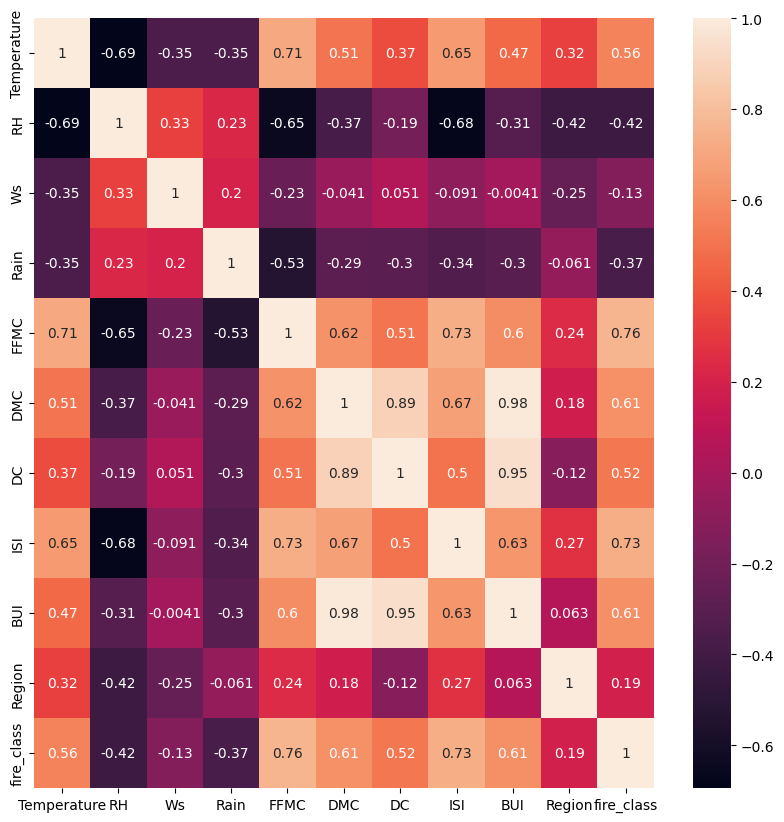

In [148]:
plt.figure(figsize = (10,10))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [149]:
# Now let's check for multicoliniarity and if 2 featrues are strongly correlated then we use only one feature and ignore another one
# making function that only return those featrues which are less correlated with each other compare to threshold value
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j] > threshold ):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [150]:
## threshold -> provide by domain expert
corr_feature = correlation(X_train,0.85)

In [151]:
corr_feature

{'BUI', 'DC'}

In [152]:
X_train.drop(corr_feature,axis = 1, inplace = True)
X_test.drop(corr_feature,axis = 1, inplace= True)
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [153]:
X_train,X_test,X_train_scaled,X_test_scaled

(     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Region  fire_class
 24            31  64  15   0.0  86.7  14.2   5.7       0           1
 199           37  37  14   0.0  94.3  35.9  16.0       1           1
 21            31  67  17   0.1  79.1   7.0   2.4       0           0
 139           33  62  10   8.7  65.5   4.6   0.9       1           0
 135           27  79  16   0.7  53.4   6.4   0.5       1           0
 ..           ...  ..  ..   ...   ...   ...   ...     ...         ...
 140           32  67  14   4.5  64.6   4.4   1.0       1           0
 45            28  76  21   0.0  72.6   7.0   0.7       0           0
 173           31  71  17   0.0  87.3  46.6   6.9       1           1
 165           34  45  17   0.0  90.5  18.0  10.9       1           1
 37            33  68  19   0.0  85.6  12.5   6.0       0           1
 
 [194 rows x 9 columns],
      Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Region  fire_class
 51            28  79  18   0.1  73.4  16.4   1.8       0      

BOX Plot to understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

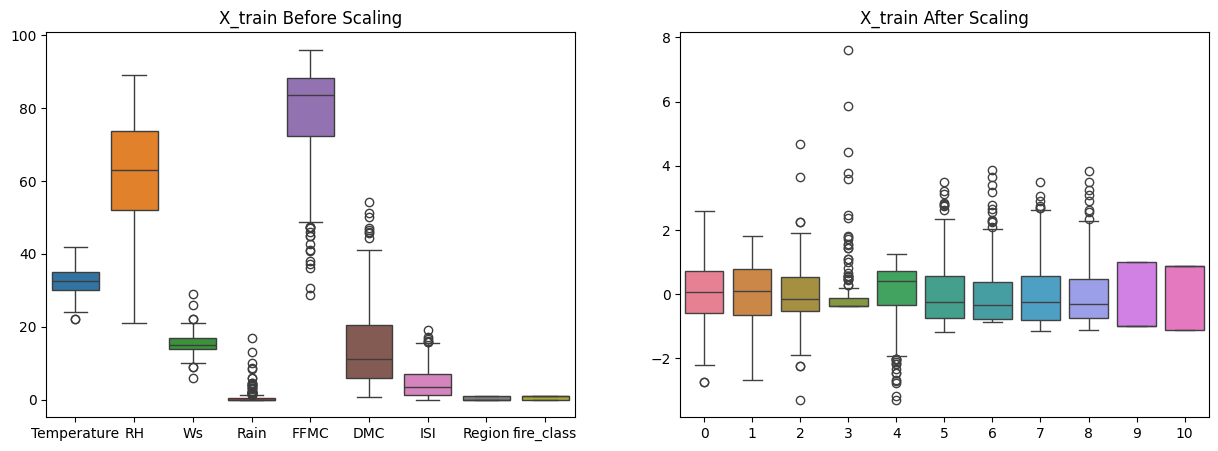

In [155]:
plt.subplots(1,2,figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

Linear Regression Model

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute Error = ', mae)
print('r2_score = ', score)

Mean absolute Error =  0.710807878775986
r2_score =  0.9849727980215806


 **Lasso Regression**  

In [159]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute Error = ', mae)
print('r2_score = ', score)

Mean absolute Error =  1.4868264342905508
r2_score =  0.9398411680932948


**Ridge Regression Model**

In [160]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae  = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error = ",mae)
print('r2_score = ',score)

Mean absolute error =  0.7256415833863127
r2_score =  0.9845498382478582


**ElasticNet Regression Model**

In [162]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train )
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error = ",mae)
print('r2_score = ',score)

Mean absolute error =  1.9775310956156742
r2_score =  0.8950108519650998


In [165]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [166]:
ridgeModel = pickle.load(open('ridge.pkl','rb'))

In [167]:
ridgeModel.coef_

array([ 0.02449139, -0.21753713, -0.02231415, -0.03152987, -0.91429102,
        0.92498474, -0.03245718,  4.61705513,  2.44203992, -0.20361465,
        0.3774826 ])

In [169]:
df = pd.read_csv("/content/my_algerian_forest_file_cleaned_dataset.csv")

In [170]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,fire_class
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0


In [171]:
df['Classes'] = df['fire_class']

In [178]:
df.drop('fire_class',axis = 1 , inplace = True).reset_index(drop = True)

KeyError: "['fire_class'] not found in axis"

In [180]:
df.reset_index(drop = True)
df.to_csv('my_algerian.csv')

In [186]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

In [191]:
df.to_csv("my_algerian_fire_same_as_sir_1.csv",index = False)

In [190]:
df.reset_index(drop = True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
